In [1]:
%load_ext lab_black

In [2]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [3]:
import os

os.sys.path.append("../")

In [4]:
import numpy as np

In [5]:
import pandas as pd

# Show all the columns and rows in pandas df
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
import matplotlib.pyplot as plt

In [7]:
import mplhep

mplhep.style.use("CMS")

The examples use uproot3 so let's stick to using this

In [8]:
import uproot3

In [9]:
uproot3.__version__

'3.14.4'

In [10]:
file = uproot3.open("../0.root")

In [11]:
events = file["L1TrackNtuple/eventTree"]

In [12]:
print(events.show())

trk_pt                     TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_eta                    TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_phi                    TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_d0                     TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_z0                     TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_chi2                   TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_bendchi2               TStreamerSTL               asjagged(asdtype('>f4'), 10)
trk_nstub                  TStreamerSTL               asjagged(asdtype('>i4'), 10)
trk_lhits                  TStreamerSTL               asjagged(asdtype('>i4'), 10)
trk_dhits                  TStreamerSTL               asjagged(asdtype('>i4'), 10)
trk_seed                   TStreamerSTL               asjagged(asdtype('>i4'), 10)
trk_genuine                TStreamerSTL               asjagged(asdtype('>i4'), 10)
trk_

In [13]:
print("Number of TPs in 1st event: ", len(events["tp_eventid"].array()[0]))

Number of TPs in 1st event:  229


In [14]:
events["tp_eventid"].array()[6]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   8,   8,   8,   9,  12,  12,  12,  12,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  23,  23,  23,  25,  25,
        25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  31,  31,  31,
        31,  31,  31,  33,  33,  34,  34,  34,  34,  36,  36,  36,  36,
        36,  37,  37,  37,  57,  59,  59,  59,  73,  75,  75,  84,  84,
        84,  85,  85,  85,  85,  85,  85,  87,  89,  91,  95,  95,  96,
        98,  98,  98, 100, 100, 100, 100, 100, 100, 100, 113, 119, 126,
       129, 134, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142,
       145, 145, 150, 150, 150, 150, 150, 151, 156, 156, 156, 156, 156,
       156, 156, 156, 156, 156, 156, 156, 156, 160, 160, 160, 161, 162,
       162, 166, 166, 166, 166, 166, 168, 168, 170, 170, 170, 170, 170,
       176, 178, 190, 192, 196, 196, 196, 197, 197, 199, 199, 199, 199],
      dtype=int32)

In [15]:
print(
    'List of "tp_eventid" values:',
    " ".join(["{:.0f}, ".format(x) for x in events["tp_eventid"].array()[0]]),
)

List of "tp_eventid" values: 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  7,  8,  8,  8,  8,  19,  20,  21,  21,  21,  21,  21,  22,  22,  22,  22,  26,  26,  26,  42,  42,  42,  42,  42,  43,  43,  43,  45,  46,  46,  46,  46,  46,  46,  46,  46,  46,  46,  46,  46,  60,  60,  60,  60,  60,  60,  61,  61,  61,  61,  61,  61,  68,  71,  71,  73,  78,  87,  88,  92,  93,  93,  93,  93,  93,  107,  114,  114,  114,  114,  114,  114,  114,  114,  114,  114,  114,  114,  116,  119,  126,  126,  126,  126,  126,  126,  127,  138,  138,  138,  138,  138,  138,  138,  139,  139,  139,  139,  139,  139,  139,  139,  139,  139,  142,  142,  148,  148,  155,  156,  156,  157,  161,  162,  166,  166,  166,  166,  166,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  172,  172,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  173,  1

In [16]:
print("Kinematic variables (truth and measured) from the slice [0,:10]")
print(
    "tp_pt       ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_pt"].array()[0, :10]]),
)

Kinematic variables (truth and measured) from the slice [0,:10]
tp_pt        100.30   2.05   6.45   8.50   7.54   6.82   5.55   3.45   2.42  11.48


In [17]:
print(
    "matchtrk_pt ",
    " ".join(["{:6.2f}".format(x) for x in events["matchtrk_pt"].array()[0, :10]]),
)

matchtrk_pt  102.94   2.03   6.48   8.51   7.59   6.89   5.54   3.44   2.51  11.44


In [18]:
print(
    "tp_eta      ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_eta"].array()[0, :10]]),
)

tp_eta        -0.90  -1.65  -0.60  -0.45  -1.65  -1.60  -1.58   0.76   0.64   0.75


In [19]:
print(
    "matchtrk_eta",
    " ".join(["{:6.2f}".format(x) for x in events["matchtrk_eta"].array()[0, :10]]),
)

matchtrk_eta  -0.90  -1.65  -0.60  -0.45  -1.65  -1.61  -1.59   0.76   0.64   0.75


In [20]:
print(
    "tp_phi      ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_phi"].array()[0, :10]]),
)
print(
    "matchtrk_phi",
    " ".join(["{:6.2f}".format(x) for x in events["matchtrk_phi"].array()[0, :10]]),
)
print(
    "tp_z0       ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_z0"].array()[0, :10]]),
)
print(
    "matchtrk_z0 ",
    " ".join(["{:6.2f}".format(x) for x in events["matchtrk_z0"].array()[0, :10]]),
)

tp_phi         0.06  -2.78  -2.81  -1.68  -1.31  -1.20  -1.30   1.56   1.80   1.86
matchtrk_phi   0.06  -2.78  -2.81  -1.68  -1.31  -1.20  -1.30   1.56   1.80   1.86
tp_z0          3.50   3.50   3.50   3.50   3.50   3.50   3.50   3.50   3.50   3.50
matchtrk_z0    3.57   3.75   3.57   3.57   3.46   3.93   3.69   3.40   3.63   3.40


In [21]:
print()
print("Variables from the slice [0,20:40]")
print(
    "tp_eventid",
    " ".join(["{:6.0f}".format(x) for x in events["tp_eventid"].array()[0, 20:40]]),
)
print(
    "tp_z0     ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_z0"].array()[0, 20:40]]),
)
print(
    "tp_d0     ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_d0"].array()[0, 20:40]]),
)
print(
    "tp_pt     ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_pt"].array()[0, 20:40]]),
)
print(
    "tp_eta    ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_eta"].array()[0, 20:40]]),
)
print(
    "tp_phi    ",
    " ".join(["{:6.2f}".format(x) for x in events["tp_phi"].array()[0, 20:40]]),
)
print(
    "tp_pdgid  ",
    " ".join(["{:6.0f}".format(x) for x in events["tp_pdgid"].array()[0, 20:40]]),
)


Variables from the slice [0,20:40]
tp_eventid      0      0      0      0      0      0      0      6      6      7      8      8      8      8     19     20     21     21     21     21
tp_z0        3.50   3.50   3.50   3.53   1.92   3.54   3.51   1.48   1.48   1.91   0.09   0.10   0.10   0.08  -1.01   5.03   3.83   3.84   3.84   3.84
tp_d0       -0.00  -0.00   0.00   0.02   0.42   1.06   0.01   0.00  -0.00  -0.00  -0.00   0.00  -0.00  -0.02  -0.00   0.00  -0.00  -0.00   0.00   0.00
tp_pt        3.02   3.47   9.84   3.51   4.42   7.65   3.05   3.93   3.12   2.49   2.08   2.19   2.33   2.09   2.87   2.01   2.57   2.17   2.36   2.32
tp_eta       0.79   0.82  -0.16  -1.50  -1.32   0.86  -0.28  -0.97   2.25   0.98   0.91   1.73   1.78   2.27  -2.18   1.61  -0.92  -0.36  -0.21  -0.57
tp_phi       2.00   1.88  -3.08   2.02   2.27  -2.90  -1.71   1.65  -2.93   0.66  -1.63   1.36   0.04  -0.60  -1.83  -0.88   2.41   2.41  -2.52  -2.32
tp_pdgid      211   -211    -13   -211   -211     11   -21

# Histograms

In [22]:
tp_vertex_id = events["tp_eventid"].array()

In [23]:
tp_vertex_id

<JaggedArray [[0 0 0 ... 211 211 211] [0 0 0 ... 177 185 187] [0 0 0 ... 227 227 227] ... [0 0 0 ... 218 222 222] [0 0 0 ... 212 212 212] [0 0 0 ... 149 155 155]] at 0x7fd052379220>

In [24]:
tp_z0 = events["tp_z0"].array()
tp_d0 = events["tp_d0"].array()
trk_z0 = events["trk_z0"].array()
trk_pt = events["trk_pt"].array()

252

In [25]:
tp_z0[0].shape

(229,)

In [27]:
trk_z0[0].shape

(239,)

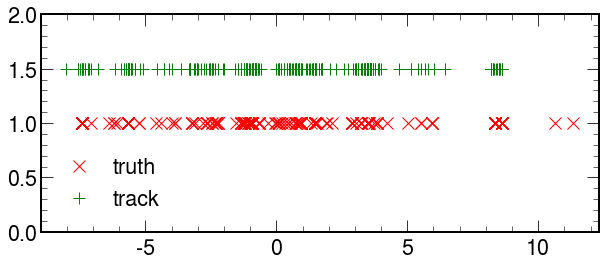

In [28]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax.plot(tp_z0[0], np.ones(len(tp_z0[0])), "xr", ms=12, mfc="r", label="truth")
ax.plot(trk_z0[0], 1.5 * np.ones(len(trk_z0[0])), "g+", ms=12, mfc="r", label="track")
plt.axis()
plt.ylim(0, 2)

plt.legend()

This mask gets the tracks associated to the primary vertex cluster

In [30]:
mask = tp_vertex_id == 0

In [31]:
mask

<JaggedArray [[True True True ... False False False] [True True True ... False False False] [True True True ... False False False] ... [True True True ... False False False] [True True True ... False False False] [True True True ... False False False]] at 0x7fd0523c5970>

This mask gets rid of clusters that belong to the secondary vertex

In [34]:
mask_no_sv = np.abs(tp_d0) < 0.01

In [40]:
len(tp_z0)

252

In [39]:
tp_z0[mask & mask_no_sv].mean().s

(252,)

In [42]:
true_z0 = tp_z0[mask & mask_no_sv].mean()

In [47]:
true_z0.shape

(252,)

In [46]:
true_z0.flatten().shape

(252,)

In [33]:
matchtrk_z0 = events["matchtrk_z0"].array()

In [34]:
matchtrk_z0

<JaggedArray [[3.5742188 3.75 3.5742188 ... 0.29296875 0.41015625 1.171875] [0.1171875 0.703125 0.8203125 ... -5.390625 2.9882812 0.05859375] [-2.8710938 -2.6367188 -2.7539062 ... -1.0546875 -999.0 -1.2304688] ... [-2.34375 -2.2265625 -2.2265625 ... -5.9179688 0.0 0.234375] [-4.9804688 -4.0429688 -4.7460938 ... -1.3476562 -1.2304688 -1.3476562] [0.41015625 0.46875 0.234375 ... 8.261719 -999.0 -1.9335938]] at 0x7fbe9828a250>

In [41]:
true_z0.flatten()

NameError: name 'true_z0' is not defined

### Track pT distribution

In [36]:
trk_pt.flatten()

array([3.2941947, 3.2990823, 4.282707 , ..., 2.1959128, 2.5165024,
       2.3176792], dtype=float32)

In [37]:
h, be = np.histogram(trk_pt.flatten(), bins=75, range=(0.0, 150.0))

Text(0, 1, 'Counts/bin')

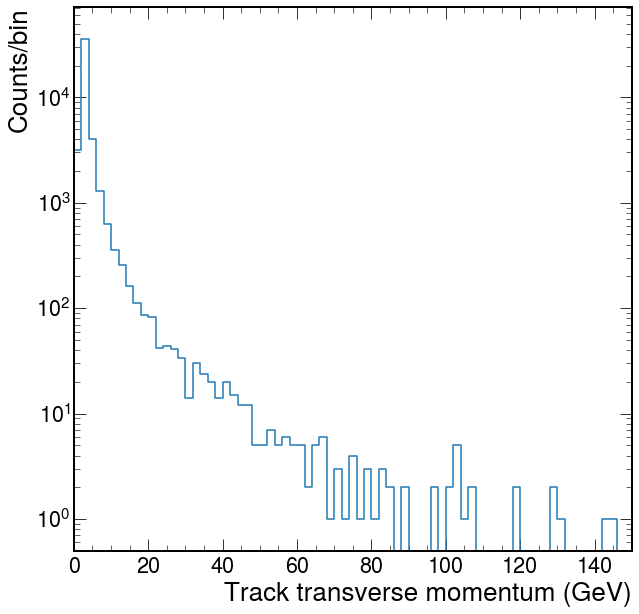

In [38]:
plt.step(x=be, y=np.append(h, 0), where="post")
plt.xlim(be[0], be[-1])
plt.yscale("log")
plt.ylim(0.5, h.max() * 2.0)
plt.xlabel("Track transverse momentum (GeV)")
plt.ylabel("Counts/bin")

### Track z0 distribution

In [39]:
h, be = np.histogram(trk_z0.flatten(), bins=20, range=(-5.0, 5.0))

Text(0, 1, 'Counts/bin')

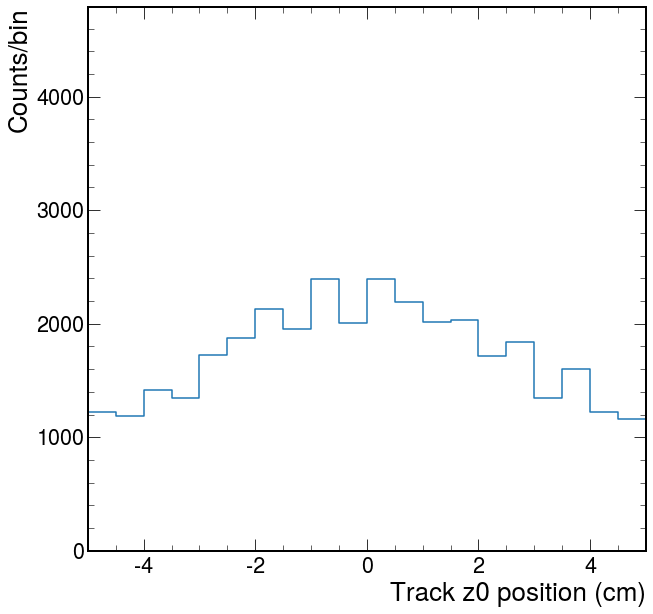

In [40]:
plt.step(x=be, y=np.append(h, 0), where="post")
plt.xlim(be[0], be[-1])
plt.yscale("linear")
plt.ylim(0, h.max() * 2)
plt.xlabel("Track z0 position (cm)")
plt.ylabel("Counts/bin")

### tp_z0 distribution

Text(0, 1, 'Counts/bin')

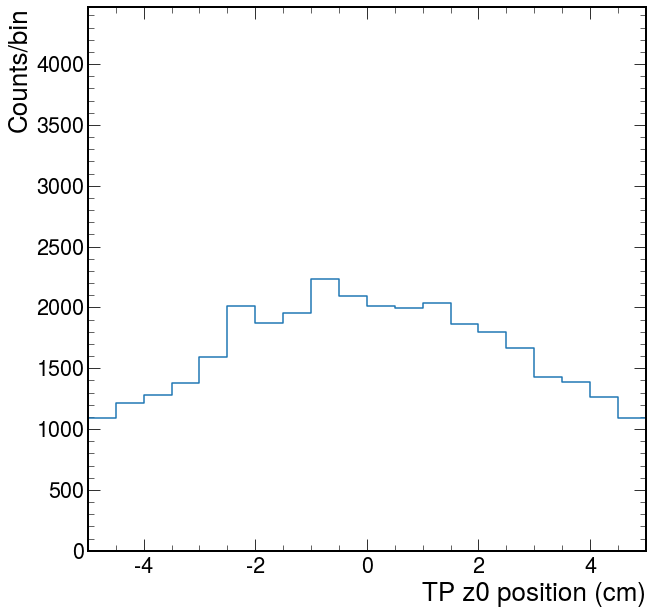

In [41]:
counts, edges = np.histogram(tp_z0.flatten(), bins=20, range=(-5.0, 5.0))
plt.step(x=edges, y=np.append(counts, 0), where="post")
plt.xlim(edges[0], edges[-1])
plt.yscale("linear")
plt.ylim(0.0, counts.max() * 2.0)
plt.xlabel("TP z0 position (cm)")
plt.ylabel("Counts/bin")

# True z0 distribution

Text(0, 1, 'Counts/bin')

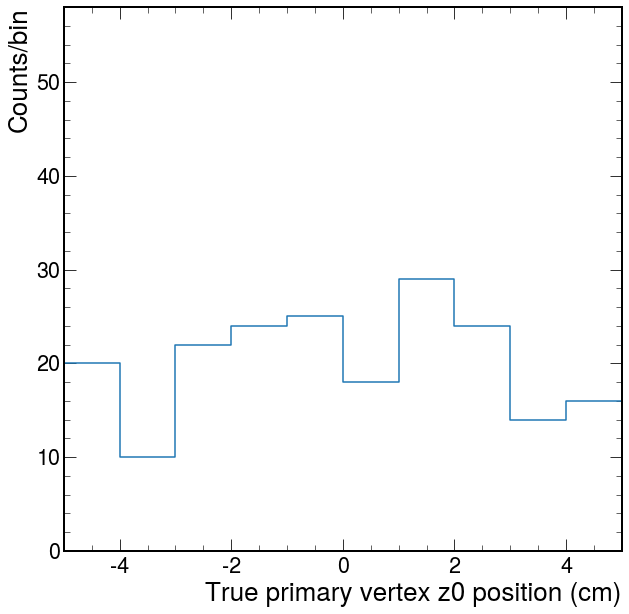

In [42]:
counts, edges = np.histogram(true_z0.flatten(), bins=10, range=(-5.0, 5.0))
plt.step(x=edges, y=np.append(counts, 0), where="post")
plt.xlim(edges[0], edges[-1])
plt.yscale("linear")
plt.ylim(0.0, counts.max() * 2.0)
plt.xlabel("True primary vertex z0 position (cm)")
plt.ylabel("Counts/bin")

### Residuals

Text(0, 1, 'Counts/bin')

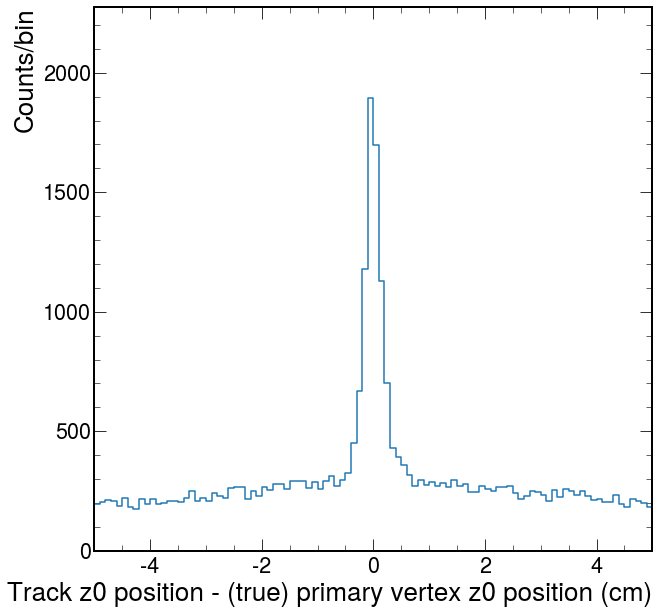

In [43]:
residuals = trk_z0 - true_z0
counts, edges = np.histogram(residuals.flatten(), bins=100, range=(-5.0, 5.0))
plt.step(x=edges, y=np.append(counts, 0), where="post")
plt.xlim(edges[0], edges[-1])
plt.yscale("linear")
plt.ylim(0.0, counts.max() * 1.2)
plt.xlabel("Track z0 position - (true) primary vertex z0 position (cm)")
plt.ylabel("Counts/bin")

Text(0, 1, 'Counts/bin')

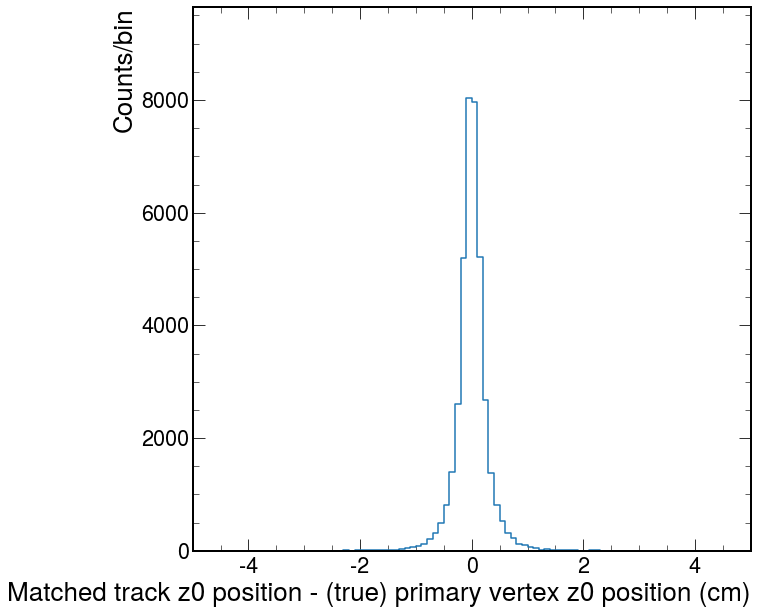

In [44]:
residuals = matchtrk_z0 - tp_z0
counts, edges = np.histogram(residuals.flatten(), bins=100, range=(-5.0, 5.0))
plt.step(x=edges, y=np.append(counts, 0), where="post")
plt.xlim(edges[0], edges[-1])
plt.yscale("linear")
plt.ylim(0.0, counts.max() * 1.2)
plt.xlabel("Matched track z0 position - (true) primary vertex z0 position (cm)")
plt.ylabel("Counts/bin")

# Read as dataframe

Let's use uproot 4 for this

In [8]:
import uproot

In [9]:
uproot.__version__

'4.1.7'

In [10]:
f4 = uproot.open("../0.root")

In [11]:
df = f4["L1TrackNtuple/eventTree;1"].arrays(library="pd")

In [12]:
trk = df[0]

In [13]:
tp = df[1]

In [14]:
trk.head()

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0   trk_chi2  \
entry subentry                                                              
0     0         3.294195  0.672711 -0.235986   999.0 -7.207031   3.886195   
      1         3.299082  0.070255 -0.303737   999.0  5.800781   3.457583   
      2         4.282707  1.931356 -0.272299   999.0 -7.558594   2.652499   
      3         2.730331 -1.494013 -0.168791   999.0  0.000000   3.931520   
      4         2.346045  1.780082  0.038812   999.0  0.117188  25.375839   

                trk_bendchi2  trk_nstub  trk_lhits  trk_dhits  trk_seed  \
entry subentry                                                            
0     0             0.565463          6     111111          0         0   
      1             1.158106          6     111111          0         0   
      2             1.138293          6         11       1111         0   
      3             0.562027          5        111        110         0   
      4             0.787909          6         11      10111         0   

                trk_genuine  trk_loose  trk_unknown  trk_combinatoric  \
entry subentry                                                          
0     0                   1          1            0                 0   
      1                   1          1            0                 0   
      2                   1          1            0                 0   
      3                   1          1            0                 0   
      4                   1          1            0                 0   

                trk_fake  trk_matchtp_pdgid  trk_matchtp_pt  trk_matchtp_eta  \
entry subentry                                                                 
0     0                2                211        3.307104         0.678369   
      1                2               -211        3.333383         0.069476   
      2                2               -211        4.196679         1.933154   
      3                2                211        2.740556        -1.497854   
      4                2               2212        2.332434         1.780198   

                trk_matchtp_phi  trk_matchtp_z0  trk_matchtp_dxy  trk_injet  \
entry subentry                                                                
0     0               -0.236771       -7.436831         0.001133          0   
      1               -0.302832        5.946478         0.000195          0   
      2               -0.270587       -7.436831         0.001133          0   
      3               -0.169511        0.002524         0.000285          0   
      4                0.041637        0.094147         0.001353          0   

                trk_injet_highpt  trk_injet_vhighpt  
entry subentry                                       
0     0                        0                  0  
      1                        0                  0  
      2                        0                  0  
      3                        0                  0  
      4                        0                  0

In [15]:
tp.shape

(44663, 43)

In [18]:
tp.groupby(["entry"])["tp_pt"].mean()[1]

3.4658437

In [19]:
import matplotlib

In [21]:
event1 = tp.loc[0, :]

In [30]:
colors = [matplotlib.cm.Spectral(float(i) / 100) for i in event1["tp_eventid"]]

In [43]:
test = event1.groupby(["tp_eventid"]).agg({"tp_eventid": "count", "tp_z0": "mean"})

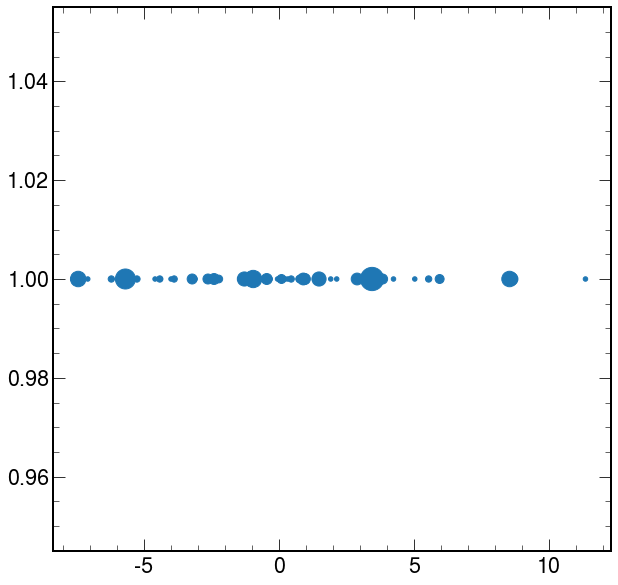

In [48]:
plt.scatter(test["tp_z0"], len(test) * [1], s=test["tp_eventid"] * 20)

# Testing dbscan

In [49]:
from sklearn.cluster import DBSCAN

ModuleNotFoundError: No module named 'sklearn'

In [51]:
mask[0].sum()

27

In [52]:
(mask[0] & mask_no_sv[0]).sum()

23